In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
from keras import Sequential 

Using TensorFlow backend.


In [4]:
%matplotlib inline

In [5]:
import numpy as np

x11 = np.random.randn(1000)
x12 = np.random.randn(1000)
X1 = np.vstack ([x11, x12])
X1 = X1.T
x21 = np.random.randn(1000) -3
x22 = np.random.randn(1000) -3
X2 = np.vstack([x21,x22])
X2 = X2.T

x31 = np.random.randn(1000)+3
x32 = np.random.randn(1000)+3
X3 = np.vstack(  [x31,x32] )
X3=X3.T

X = np.vstack ( [X1,X2,X3]  )

In [6]:
ind_all = np.arange(2000)
np.random.shuffle(ind_all)
ind_train = ind_all[:1600]
ind_test = ind_all[1600:]

In [7]:
y = np.zeros(3000)
y[1000:] = 1


In [8]:
X.shape

(3000, 2)

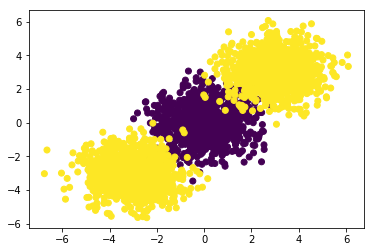

In [9]:
plt.scatter(X[:,0] ,X[:,1],c=y)

In [10]:
# Create your first MLP in Keras
from keras.models import Sequential
from keras.layers import Dense
import numpy
# fix random seed for reproducibility
numpy.random.seed(7)
# load pima indians dataset
# create model
model = Sequential()
model.add(Dense(12, input_dim=2, activation='relu'))
# model.add(Dense(8, activation='relu'))
model.add(Dense(1,  activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X[ind_train], y[ind_train], epochs=20, batch_size=10)
# evaluate the model
scores = model.evaluate(X[ind_test], y[ind_test])
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100)) 

Epoch 1/20
1600/1600 [==============================] - 1s 862us/step - loss: 0.3775 - acc: 0.8400

In [11]:
x1_grid = np.linspace(-6,3,20)
x2_grid = np.linspace(-6,3,20)

In [12]:
X_grid = np.vstack ( [x1_grid, x2_grid ])

In [13]:
X_grid = X_grid.T

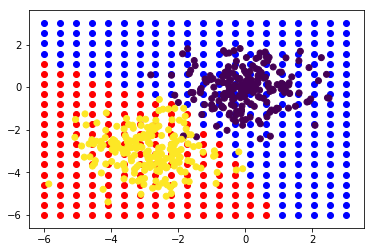

In [14]:

for i in range(len(x1_grid)):
    for j in range(len(x2_grid)):
        test = np.array ( [ [x1_grid[i], x2_grid[j]]])
        temp = model.predict( test)
        temp = np.round(temp)
        if temp ==0:
            plt.scatter(x1_grid[i], x2_grid[j], c='b')
        else:
            plt.scatter(x1_grid[i], x2_grid[j],c='r')

plt.scatter(X[ind_test,0], X[ind_test,1], c=y[ind_test])
